<div class="">
<br><br>
<center><br><font size="12"><font face="calibri"><strong>UJIAN AKHIR SEMESTER (UAS)
<center><br><font size="5"><font face="calibri"><strong>Memprediksi Penyakit Liver Menggunakan Metode Artificial Neural Network
<br>
<br>
<br><strong>Haqiqi Oktaviani
<br><strong>09011181823127
<br><br>
<br><strong>Mata Kuliah Praktikum Kecerdasan Buatan
<br>
<br><strong>Dosen Pengampuh : 
<br><strong>Prof. Dr. Ir. Siti Nurmaini, M.T.
<br><br><br>

# MEMANGGIL LIBRARY

Berikut library yang digunakan pada program kali ini :

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
import pandas as pd
import sklearn

Using TensorFlow backend.


# MEMBACA DATA

Selanjutnya memanggil data yang akan kita gunakan, dalam hal ini saya menggunakan dataset Indian Liver.<br>
- Input terdiri dari 9 variabel dengan berbagai kondisi pada permasalahan yang dibahas.<br>
- Output terdiri dari 1 dengan kondisi 1 dan 0.

In [4]:
dataset = pd.read_csv("D:/SEMESTER 5/prak AI/liver.csv")

In [3]:
dataset.head()

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0


# MEMISAHKAN ANTARA FITUR DAN LABEL PADA DATASET

Berikut merupakan perintah untuk memisahkan antara fitur dan label:

In [4]:
fitur = dataset.iloc[:, 0:9].values
label = dataset.iloc[:, -1].values

# SPLITTING DATA

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fitur, label, test_size=0.2, random_state=20)

# PREPROCESSING

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# One hot encode target values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
one_hot = OneHotEncoder()
y_train = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test = one_hot.transform(y_test.reshape(-1, 1)).todense()

C:\Users\aldipred\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


# MODEL ANN

In [8]:
model = Sequential()
model.add(Dense(units=18, input_dim = 9, activation='relu'))
model.add(Dense(units= 2, activation='sigmoid'))

# COMPILE MODEL

In [9]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# TRAINING MODEL DENGAN DATA TRAINING

In [10]:
#Proses training
training = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, 
                         epochs=30)

Train on 466 samples, validate on 117 samples
Epoch 1/30
466/466 [==============================] - 1s 2ms/step - loss: 0.6759 - accuracy: 0.5064 - val_loss: 0.6590 - val_accuracy: 0.5085
Epoch 2/30
466/466 [==============================] - 0s 87us/step - loss: 0.6638 - accuracy: 0.5182 - val_loss: 0.6464 - val_accuracy: 0.5470
Epoch 3/30
466/466 [==============================] - 0s 69us/step - loss: 0.6527 - accuracy: 0.5805 - val_loss: 0.6358 - val_accuracy: 0.6538
Epoch 4/30
466/466 [==============================] - 0s 77us/step - loss: 0.6435 - accuracy: 0.6727 - val_loss: 0.6264 - val_accuracy: 0.7179
Epoch 5/30
466/466 [==============================] - 0s 77us/step - loss: 0.6352 - accuracy: 0.7060 - val_loss: 0.6184 - val_accuracy: 0.7179
Epoch 6/30
466/466 [==============================] - 0s 69us/step - loss: 0.6276 - accuracy: 0.7114 - val_loss: 0.6108 - val_accuracy: 0.7179
Epoch 7/30
466/466 [==============================] - 0s 77us/step - loss: 0.6201 - accuracy: 0.7

# MENGHITUNG AKURASI

Berikut hasil akurasinya:

In [11]:
testing = model.evaluate(X_test, y_test)
testing

117/117 [==============================] - 0s 103us/step


[0.5650998644339733, 0.7179487347602844]

# PLOT MODEL  ACCURACY

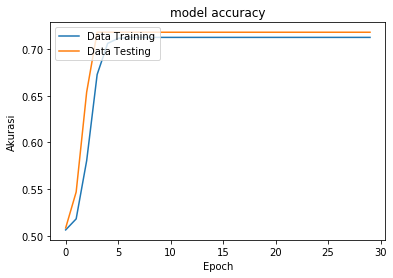

In [12]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data Training', 'Data Testing'], loc='upper left')
plt.show()

# PLOT MODEL LOSS

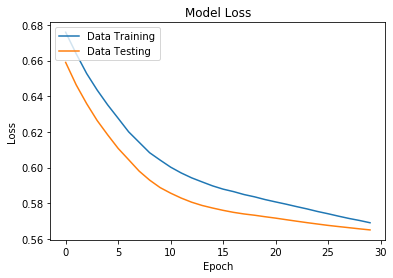

In [13]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data Training', 'Data Testing'], loc='upper left')
plt.show()

In [14]:
prediction_x = model.predict_classes(X_test)

In [15]:
#mengubah data y_test kedalam bentuk array
prediction_y = [np.argmax(t) for t in y_test]
prediction_y = np.array(prediction_y)

# CONFUSION MATRIKS

In [16]:
from sklearn.metrics import confusion_matrix
ConfusionMatrix = confusion_matrix(prediction_x, prediction_y)
cm = ConfusionMatrix
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]
print("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[84 33]
 [ 0  0]]


# EVALUASI MODEL DENGAN CONFUSION MATRIKS

## 1. AKURASI

Berikut cara menghitung nilai akurasi pada confusion matriks:

In [17]:
akurasi = (tn+tp) / (tp+tn+fp+fn)
print("Hasil Akurasi = ", akurasi)

Hasil Akurasi =  0.717948717948718


## 2. PRECISION

Berikut cara menghitung nilai precision pada confusion matriks:

In [18]:
precision = tp / ( fp + tp)
print("Hasil Precision = ", precision)

Hasil Precision =  0.717948717948718


## 3. RECALL

Berikut cara menghitung nilai recall pada confusion matriks:

In [19]:
recall = tp/(fn+tp)
print("Hasil Recall = ",recall)

Hasil Recall =  1.0


## 4. F1

Berikut cara menghitung nilai F1 pada confusion matriks:

In [20]:
f1=(2*precision*recall)/ (precision+recall)
print("Hasil F1 = ",f1)

Hasil F1 =  0.835820895522388
